In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.datasets.mnist import load_data
from keras.models import Model
from keras.layers import Input, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Lambda, Activation
from matplotlib import pyplot
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [2]:
features = pd.read_csv("/Users/kwonheejin/Documents/DL/dataset/pamap2.csv", index_col=0)

In [3]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [4]:
label = LabelEncoder()
features['activityID'] = label.fit_transform(features['activityID'])
features.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,0,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
2943,37.81,0,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.0,0.0,0.0,0.0,1
2954,37.92,0,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,1
2965,38.03,0,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,1
2976,38.14,0,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,1


In [5]:
features['activityID'].value_counts()

3    20998
0    17575
2    17256
1    16881
5    16857
6    10699
7     9585
4     8665
Name: activityID, dtype: int64

<Axes: xlabel='activityID', ylabel='count'>

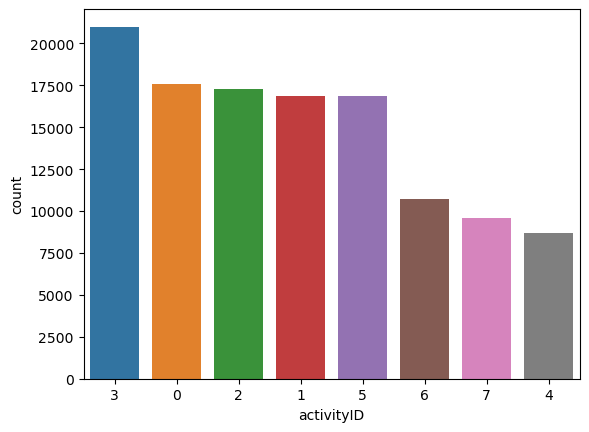

In [6]:
sns.countplot(x = "activityID", data = features, order = features.activityID.value_counts().index)

In [7]:
indexes = features[features['activityID'] == 0].index
features.drop(indexes , inplace=True)

In [8]:
features['activityID'].value_counts()

3    20998
2    17256
1    16881
5    16857
6    10699
7     9585
4     8665
Name: activityID, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
hand_data=features[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
                     'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
                     'handGyro1', 'handGyro2', 'handGyro3', 
                     'handMagne1', 'handMagne2', 'handMagne3', 'activityID']]
                    
hand_X=hand_data[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
                     'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
                     'handGyro1', 'handGyro2', 'handGyro3', 
                     'handMagne1', 'handMagne2', 'handMagne3']]

hand_y= hand_data['activityID']

scaler = StandardScaler()
hand_X = scaler.fit_transform(hand_X)

scaled_hand_X = pd.DataFrame(data = hand_X, columns = 
                    ['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
                     'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
                     'handGyro1', 'handGyro2', 'handGyro3', 
                     'handMagne1', 'handMagne2', 'handMagne3'])

scaled_hand_X['label'] = hand_y.values

scaled_hand_X.head(10)
scaled_hand_X.shape

(100941, 13)

In [11]:
chest_data = features[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
                     'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
                     'chestGyro1', 'chestGyro2', 'chestGyro3', 
                     'chestMagne1', 'chestMagne2', 'chestMagne3', 'activityID']]

chest_X = chest_data[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
                     'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
                     'chestGyro1', 'chestGyro2', 'chestGyro3', 
                     'chestMagne1', 'chestMagne2', 'chestMagne3']]

chest_y = chest_data['activityID']

scaler = StandardScaler()
chest_X = scaler.fit_transform(chest_X)

scaled_chest_X = pd.DataFrame(data=chest_X, columns=
                    ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
                     'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
                     'chestGyro1', 'chestGyro2', 'chestGyro3', 
                     'chestMagne1', 'chestMagne2', 'chestMagne3'])

scaled_chest_X['label'] = chest_y.values

scaled_chest_X.head(10)
scaled_chest_X.shape

(100941, 13)

In [12]:
from sklearn.model_selection import train_test_split

X_train_hand, X_test_hand, y_train_hand, y_test_hand = train_test_split(scaled_hand_X, 
                                                    scaled_hand_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [13]:
from sklearn.model_selection import train_test_split

X_train_chest, X_test_chest, y_train_chest, y_test_chest = train_test_split(scaled_chest_X, 
                                                    scaled_chest_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)


In [14]:
X_train_hand['label'].value_counts()

3    15757
2    12937
5    12641
1    12632
6     8052
7     7180
4     6506
Name: label, dtype: int64

In [15]:
X_test_hand['label'].value_counts()

3    5241
2    4319
1    4249
5    4216
6    2647
7    2405
4    2159
Name: label, dtype: int64

In [16]:
X_train_chest['label'].value_counts()

3    15757
2    12937
5    12641
1    12632
6     8052
7     7180
4     6506
Name: label, dtype: int64

In [17]:
X_test_chest['label'].value_counts()

3    5241
2    4319
1    4249
5    4216
6    2647
7    2405
4    2159
Name: label, dtype: int64

In [18]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [19]:
print(X_train_hand.shape, X_test_hand.shape)
print(y_train_hand.shape, y_test_hand.shape)

(75705, 13) (25236, 13)
(75705,) (25236,)


In [20]:
print(X_train_chest.shape, X_test_chest.shape)
print(y_train_chest.shape, y_test_chest.shape)

(75705, 13) (25236, 13)
(75705,) (25236,)


In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

unique, counts = np.unique(y_train_hand, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test_hand, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[    1 12632]
 [    2 12937]
 [    3 15757]
 [    4  6506]
 [    5 12641]
 [    6  8052]
 [    7  7180]]
Test data label statistics::
[[   1 4249]
 [   2 4319]
 [   3 5241]
 [   4 2159]
 [   5 4216]
 [   6 2647]
 [   7 2405]]


In [22]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

In [23]:
X_train_hand, y_train_hand = create_dataset(X_train_hand[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
                     'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
                     'handGyro1', 'handGyro2', 'handGyro3', 
                     'handMagne1', 'handMagne2', 'handMagne3']], X_train_hand.label, TIME_STEPS, STEP)

X_test_hand, y_test_hand = create_dataset(X_test_hand[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
                     'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
                     'handGyro1', 'handGyro2', 'handGyro3', 
                     'handMagne1', 'handMagne2', 'handMagne3']], X_test_hand.label, TIME_STEPS, STEP)
print(X_train_hand.shape, y_train_hand.shape)

/var/folders/_y/cmlp5dyd3tdb35r5_kr1z35w0000gn/T/ipykernel_84763/326321166.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
/var/folders/_y/cmlp5dyd3tdb35r5_kr1z35w0000gn/T/ipykernel_84763/326321166.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False

(75704, 1, 12) (75704, 1)


In [24]:
X_train_chest, y_train_chest = create_dataset(X_train_chest[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
                     'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
                     'chestGyro1', 'chestGyro2', 'chestGyro3', 
                     'chestMagne1', 'chestMagne2', 'chestMagne3']], X_train_chest.label, TIME_STEPS, STEP)

X_test_chest, y_test_chest = create_dataset(X_test_chest[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
                     'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
                     'chestGyro1', 'chestGyro2', 'chestGyro3',
                     'chestMagne1', 'chestMagne2', 'chestMagne3']], X_test_chest.label, TIME_STEPS, STEP)
print(X_train_chest.shape, y_train_chest.shape)

/var/folders/_y/cmlp5dyd3tdb35r5_kr1z35w0000gn/T/ipykernel_84763/326321166.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
/var/folders/_y/cmlp5dyd3tdb35r5_kr1z35w0000gn/T/ipykernel_84763/326321166.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False

(75704, 1, 12) (75704, 1)


In [25]:
from sklearn.preprocessing import OneHotEncoder

enc1 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc1.fit(y_train_hand)

y_train_hand = enc1.transform(y_train_hand)
y_test_hand = enc1.transform(y_test_hand)

/Users/kwonheejin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
from sklearn.preprocessing import OneHotEncoder

enc2 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc2 = enc2.fit(y_train_chest)

y_train_chest = enc1.transform(y_train_chest)
y_test_chest = enc1.transform(y_test_chest)

/Users/kwonheejin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
print("X_train.shape: ", X_train_hand.shape)
print("X_test.shape ", X_test_hand.shape)
print("y_train.shape ", y_train_hand.shape)
print("y_test.shape ", y_test_hand.shape)

X_train.shape:  (75704, 1, 12)
X_test.shape  (25235, 1, 12)
y_train.shape  (75704, 7)
y_test.shape  (25235, 7)


In [28]:
print("X_train.shape: ", X_train_chest.shape)
print("X_test.shape ", X_test_chest.shape)
print("y_train.shape ", y_train_chest.shape)
print("y_test.shape ", y_test_chest.shape)

X_train.shape:  (75704, 1, 12)
X_test.shape  (25235, 1, 12)
y_train.shape  (75704, 7)
y_test.shape  (25235, 7)


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
# from keras.utils import np_utils

In [31]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train_hand.shape[1],X_train_hand.shape[2],y_train_hand.shape[1]

In [32]:
n_timesteps, n_features, n_outputs


(1, 12, 7)

In [33]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train_hand.shape[1], X_train_hand.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train_hand.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [34]:
history = model.fit(X_train_hand, y_train_hand, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
2130/2130 [==============================] - 3s 1ms/step - loss: 0.9508 - acc: 0.6872 - val_loss: 0.7399 - val_acc: 0.7556
Epoch 2/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.7437 - acc: 0.7506 - val_loss: 0.6553 - val_acc: 0.7793
Epoch 3/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.6793 - acc: 0.7695 - val_loss: 0.5938 - val_acc: 0.8012
Epoch 4/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.6352 - acc: 0.7829 - val_loss: 0.5637 - val_acc: 0.8066
Epoch 5/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.6078 - acc: 0.7899 - val_loss: 0.5363 - val_acc: 0.8146
Epoch 6/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.5855 - acc: 0.7977 - val_loss: 0.5163 - val_acc: 0.8221
Epoch 7/10
2130/2130 [==============================] - 2s 1ms/step - loss: 0.5715 - acc: 0.8022 - val_loss: 0.4994 - val_acc: 0.8258
Epoch 8/10
2130/2130 [==============================] - 2s 1ms

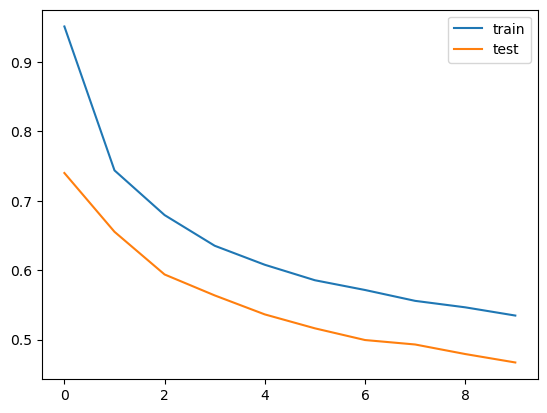

In [35]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [36]:
model.evaluate(X_test_hand, y_test_hand)
y_pred = model.predict(X_test_hand)

789/789 [==============================] - 0s 357us/step


In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_hand,axis=1)
Y_pred = np.argmax(model.predict(X_test_hand),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

789/789 [==============================] - 0s 377us/step
Confusion Matrix
[[4014  154   27    8   13   10   23]
 [  39 4083   60   11   35   38   52]
 [  31  126 4481   18  194  315   76]
 [   7   54   35 1965   50   27   21]
 [  54   62  225   44 3666   93   72]
 [  59  140  465   39  154 1509  281]
 [  75  163  273   24   97  353 1420]]


In [38]:
model.evaluate(X_test_chest, y_test_chest)
y_pred = model.predict(X_test_chest)

789/789 [==============================] - 0s 380us/step


In [39]:
%time
print(X_test_hand.shape,y_test_hand.shape)
base_loss,base_accuracy=model.evaluate(X_test_hand,y_test_hand,batch_size=batch_size,verbose=1)

cnn_file='D:/HAR/DSADS/CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 3.1 µs
(25235, 1, 12) (25235, 7)
789/789 [==============================] - 0s 396us/step - loss: 0.4686 - acc: 0.8376
model saved at  D:/HAR/DSADS/CNN_Model.h5
Accuracy >83.764613
Base Loss >0.47


/var/folders/_y/cmlp5dyd3tdb35r5_kr1z35w0000gn/T/ipykernel_84763/206080926.py:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, cnn_file, include_optimizer=False)


In [40]:
base_model = keras.models.load_model(cnn_file)

In [41]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 3

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(7, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  4


In [42]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional,False
1,<keras.src.layers.regularization.dropout.Dropo...,dropout,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense,False
3,<keras.src.layers.core.dense.Dense object at 0...,dense_1,True


In [43]:
history2 = new_model.fit(X_train_chest, y_train_chest, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
2130/2130 [==============================] - 2s 595us/step - loss: 1.7970 - accuracy: 0.3323 - val_loss: 1.4405 - val_accuracy: 0.4631
Epoch 2/10
2130/2130 [==============================] - 1s 488us/step - loss: 1.4054 - accuracy: 0.4758 - val_loss: 1.2912 - val_accuracy: 0.5196
Epoch 3/10
2130/2130 [==============================] - 1s 488us/step - loss: 1.3080 - accuracy: 0.5092 - val_loss: 1.2203 - val_accuracy: 0.5516
Epoch 4/10
2130/2130 [==============================] - 1s 492us/step - loss: 1.2538 - accuracy: 0.5295 - val_loss: 1.1779 - val_accuracy: 0.5736
Epoch 5/10
2130/2130 [==============================] - 1s 508us/step - loss: 1.2185 - accuracy: 0.5432 - val_loss: 1.1477 - val_accuracy: 0.5829
Epoch 6/10
2130/2130 [==============================] - 1s 501us/step - loss: 1.1924 - accuracy: 0.5515 - val_loss: 1.1246 - val_accuracy: 0.5932
Epoch 7/10
2130/2130 [==============================] - 1s 524us/step - loss: 1.1743 - accuracy: 0.5585 - val_loss: 1.1077 -

In [45]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.legacy.SGD(lr=1e-3),
                     metrics=["accuracy"])

/Users/kwonheejin/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [46]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional,True
1,<keras.src.layers.regularization.dropout.Dropo...,dropout,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_1,True


In [48]:
history2 = new_model.fit(X_train_hand, y_train_hand, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
2130/2130 [==============================] - 3s 1ms/step - loss: 1.2906 - accuracy: 0.5609 - val_loss: 0.9502 - val_accuracy: 0.6882
Epoch 2/10
2130/2130 [==============================] - 2s 892us/step - loss: 0.9287 - accuracy: 0.6907 - val_loss: 0.8034 - val_accuracy: 0.7368
Epoch 3/10
2130/2130 [==============================] - 2s 918us/step - loss: 0.8234 - accuracy: 0.7271 - val_loss: 0.7336 - val_accuracy: 0.7586
Epoch 4/10
2130/2130 [==============================] - 2s 909us/step - loss: 0.7687 - accuracy: 0.7436 - val_loss: 0.6900 - val_accuracy: 0.7773
Epoch 5/10
2130/2130 [==============================] - 2s 897us/step - loss: 0.7312 - accuracy: 0.7558 - val_loss: 0.6597 - val_accuracy: 0.7848
Epoch 6/10
2130/2130 [==============================] - 2s 893us/step - loss: 0.7038 - accuracy: 0.7646 - val_loss: 0.6372 - val_accuracy: 0.7922
Epoch 7/10
2130/2130 [==============================] - 2s 899us/step - loss: 0.6813 - accuracy: 0.7712 - val_loss: 0.6196 - v

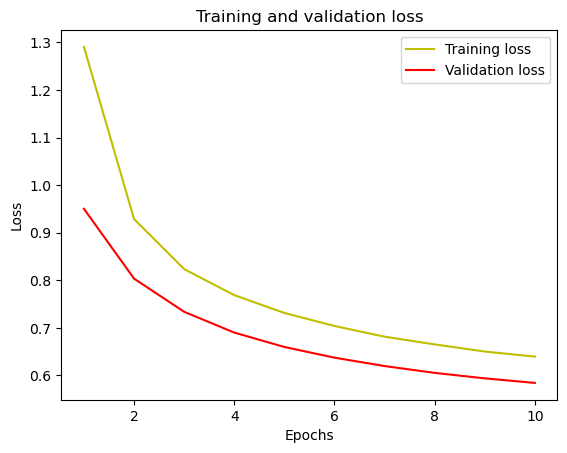

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

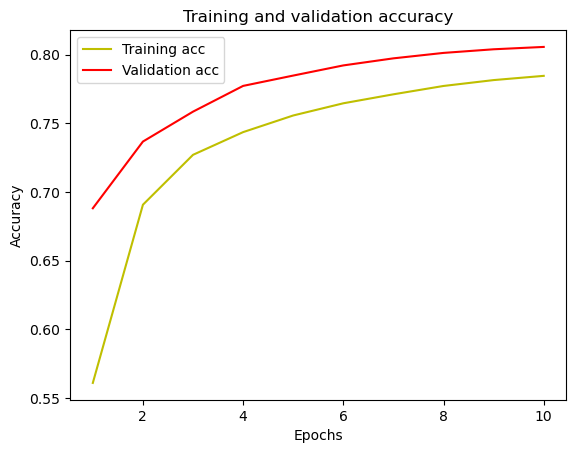

In [50]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
new_model.evaluate(X_test_hand, y_test_hand)
y_pred = new_model.predict(X_test_hand)

789/789 [==============================] - 0s 352us/step
